# Blood Glucose Control - EDA

**Name:** James Cai



### Import Data

There are multiple data sets each corresponding to a person with diabetes. Please load the files into a single data set while retaining the ability to distinguish between the PWD. 

In [50]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels
from datetime import datetime

# PWD logs
data_dir = ['../data/gluroo_500030.csv', '../data/gluroo_679372.csv']

# This list will store all PWD data
df = []

# Iterating over directory containing PWD data 
for csv in data_dir: 
    sender_id = csv.split("_")[1].split(".")[0]
    PWD_data = pd.read_csv(csv)
    PWD_data["sender_id"] = sender_id
    df.append(PWD_data)

df = pd.concat(df)
df['date'] = pd.to_datetime(df['date'], utc=True, format='ISO8601')

df

,date,sender_id,bgl,bgl_date_millis,text,template,msg_type,affects_fob,affects_iob,dose_units,food_g,food_glycemic_index,dose_automatic,fp_bgl,message_basal_change,__typename,trend
0,2024-05-01 05:00:27.029000+00:00,500030,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT
1,2024-05-01 05:05:27.183000+00:00,500030,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT
2,2024-05-01 05:10:26.949000+00:00,500030,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT
3,2024-05-01 05:15:27.180000+00:00,500030,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT
4,2024-05-01 05:20:27.021000+00:00,500030,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32170,2024-08-01 03:44:59+00:00,679372,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT
32171,2024-08-01 03:48:03+00:00,679372,169.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT
32172,2024-08-01 03:52:06+00:00,679372,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT
32173,2024-08-01 03:55:08+00:00,679372,164.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Reading,FLAT


### Two Data Visualizations

Create at least two visualizations that are of interest to you. They can be things that would be useful information for a PWD to know, or they could be useful for informing future modeling work. If you aren't sure what to visualize try recreating common diabetes data visualizations that you can find on the internet. 

In [5]:
# Helper Functions

def isolate_pwd_data(df, pwd_id):
    return df[df['sender_id'] == pwd_id]

def isolate_day_data(df, date):
     return df[df['date'].dt.date == pd.Timestamp(date).date()]

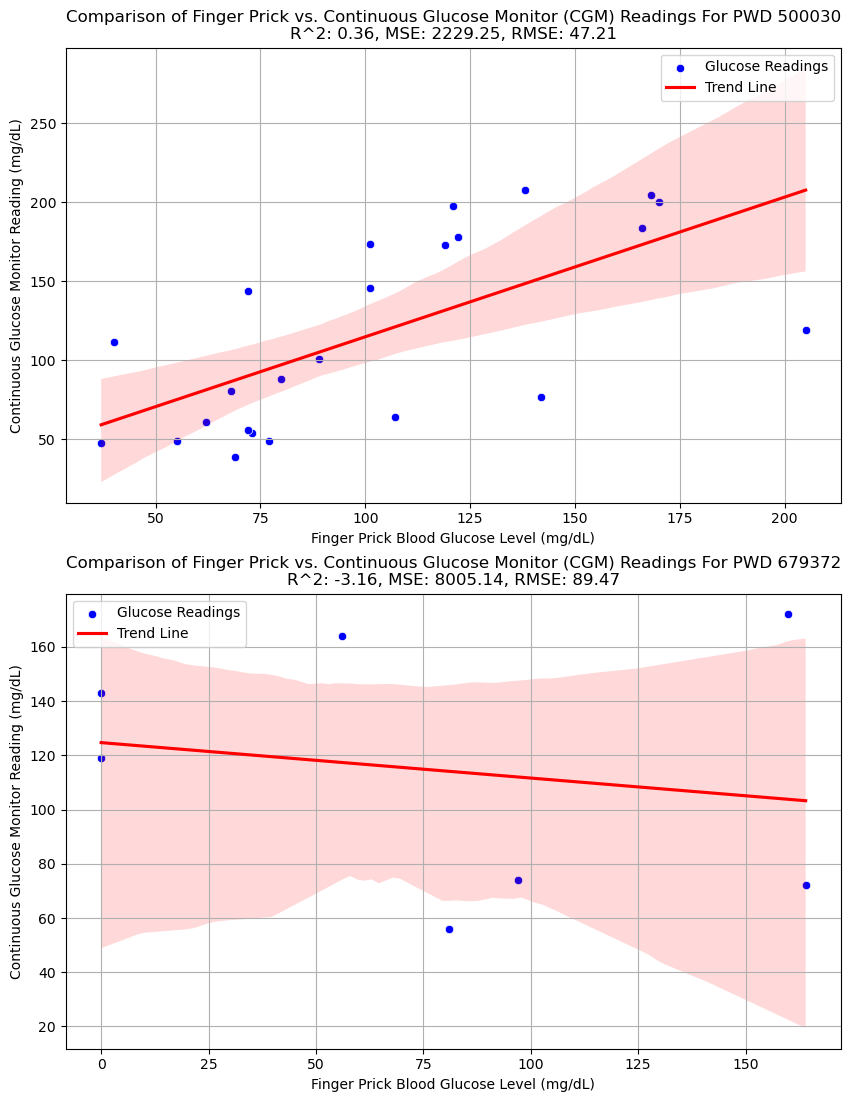

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

pwd_500030_data = isolate_pwd_data(df, '500030')
pwd_679372_data = isolate_pwd_data(df, '679372')

# Filter data to keep only rows where both bgl (CGM) and fp_bgl (finger prick) readings are available
filtered_data_500030 = pwd_500030_data[['bgl', 'fp_bgl']].dropna()
filtered_data_679372 = pwd_679372_data[['bgl', 'fp_bgl']].dropna()

# Error Calculations

# R-Squared Error
r2_bgl_cgm_500030 = r2_score(filtered_data_500030['bgl'], filtered_data_500030['fp_bgl'])
r2_bgl_cgm_679372 = r2_score(filtered_data_679372['bgl'], filtered_data_679372['fp_bgl'])

# Mean-Squared Error
mse_bgl_cgm_500030 = mean_squared_error(filtered_data_500030['bgl'], filtered_data_500030['fp_bgl'])
mse_bgl_cgm_679372 = mean_squared_error(filtered_data_679372['bgl'], filtered_data_679372['fp_bgl'])

# Root-Mean-Squared Error
rmse_bgl_cgm_500030 = np.sqrt(mse_bgl_cgm_500030)
rmse_bgl_cgm_679372 = np.sqrt(mse_bgl_cgm_679372)


plt.figure(figsize=(10, 13))

# Create the scatter plot
plt.subplot(2,1,1)
sns.scatterplot(x='fp_bgl', y='bgl', data=filtered_data_500030, color='blue', label='Glucose Readings')

# Add a trend line 
sns.regplot(x='fp_bgl', y='bgl', data=filtered_data_500030, scatter=False, color='red', label='Trend Line')

# Label the plot
plt.title(f'Comparison of Finger Prick vs. Continuous Glucose Monitor (CGM) Readings For PWD 500030\nR^2: {r2_bgl_cgm_500030:.2f}, MSE: {mse_bgl_cgm_500030:.2f}, RMSE: {rmse_bgl_cgm_500030:.2f}')
plt.xlabel('Finger Prick Blood Glucose Level (mg/dL)')
plt.ylabel('Continuous Glucose Monitor Reading (mg/dL)')
plt.legend()
plt.grid(True)

# Create the scatter plot
plt.subplot(2,1,2)
sns.scatterplot(x='fp_bgl', y='bgl', data=filtered_data_679372, color='blue', label='Glucose Readings')

# Add a trend line 
sns.regplot(x='fp_bgl', y='bgl', data=filtered_data_679372, scatter=False, color='red', label='Trend Line')

# Label the plot
plt.title(f'Comparison of Finger Prick vs. Continuous Glucose Monitor (CGM) Readings For PWD 679372\nR^2: {r2_bgl_cgm_679372:.2f}, MSE: {mse_bgl_cgm_679372:.2f}, RMSE: {rmse_bgl_cgm_679372:.2f}')
plt.xlabel('Finger Prick Blood Glucose Level (mg/dL)')
plt.ylabel('Continuous Glucose Monitor Reading (mg/dL)')
plt.legend()
plt.grid(True)

plt.show()

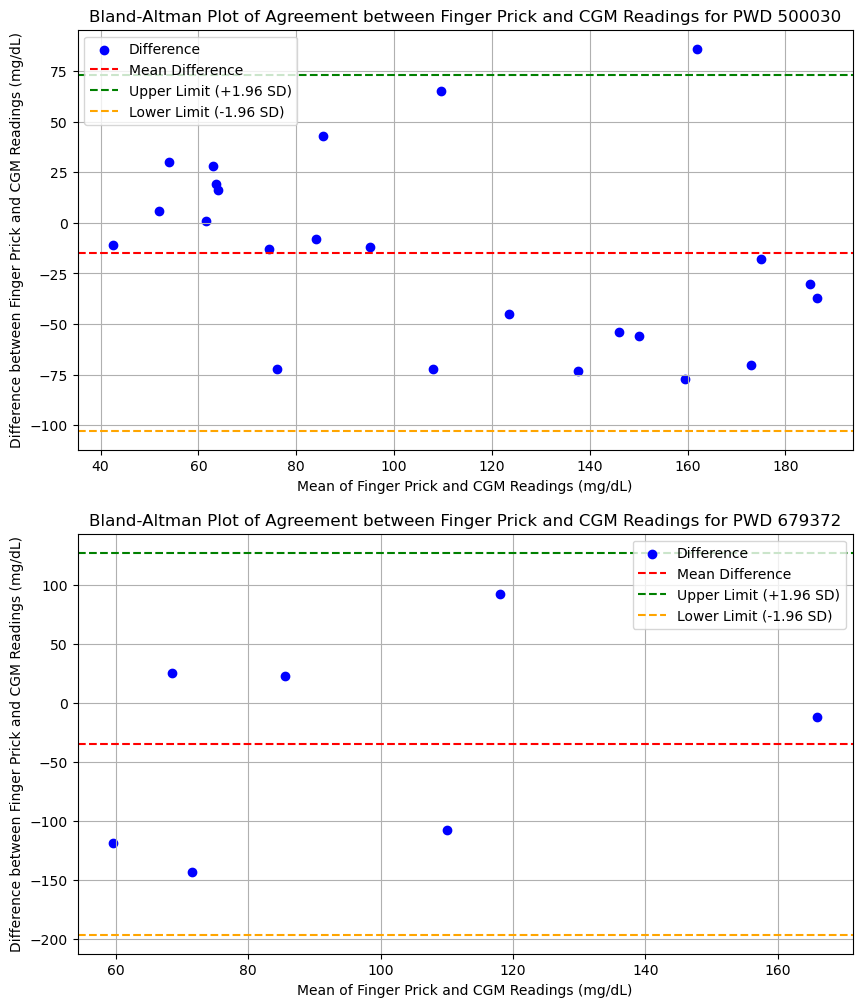

In [58]:
def bland_altman_plot(df1, df2, title):
    # Calculate the means and differences
    mean = np.mean([df1, df2], axis=0)
    diff = df1 - df2
    mean_diff = np.mean(diff)
    std_diff = np.std(diff)
    
    # Create the Bland-Altman plot
    plt.scatter(mean, diff, color='blue', label='Difference')
    
    # Add lines for mean and limits of agreement (+-1.96*std_diff)
    plt.axhline(mean_diff, color='red', linestyle='--', label='Mean Difference')
    plt.axhline(mean_diff + 1.96 * std_diff, color='green', linestyle='--', label='Upper Limit (+1.96 SD)')
    plt.axhline(mean_diff - 1.96 * std_diff, color='orange', linestyle='--', label='Lower Limit (-1.96 SD)')
    
    # Add labels and title
    plt.title(title)
    plt.xlabel('Mean of Finger Prick and CGM Readings (mg/dL)')
    plt.ylabel('Difference between Finger Prick and CGM Readings (mg/dL)')
    plt.legend()
    plt.grid(True)


fp_bgl_500030 = filtered_data_500030['fp_bgl']
bgl_500030 = filtered_data_500030['bgl']

# Data for PWD 679372
fp_bgl_679372 = filtered_data_679372['fp_bgl']
bgl_679372 = filtered_data_679372['bgl']

plt.figure(figsize=(10, 12))

# Bland-Altman plot for PWD 500030
plt.subplot(2, 1, 1)
bland_altman_plot(fp_bgl_500030, bgl_500030, 'Bland-Altman Plot of Agreement between Finger Prick and CGM Readings for PWD 500030')

# Bland-Altman plot for PWD 679372
plt.subplot(2, 1, 2)
bland_altman_plot(fp_bgl_679372, bgl_679372, 'Bland-Altman Plot of Agreement between Finger Prick and CGM Readings for PWD 679372')

plt.show()

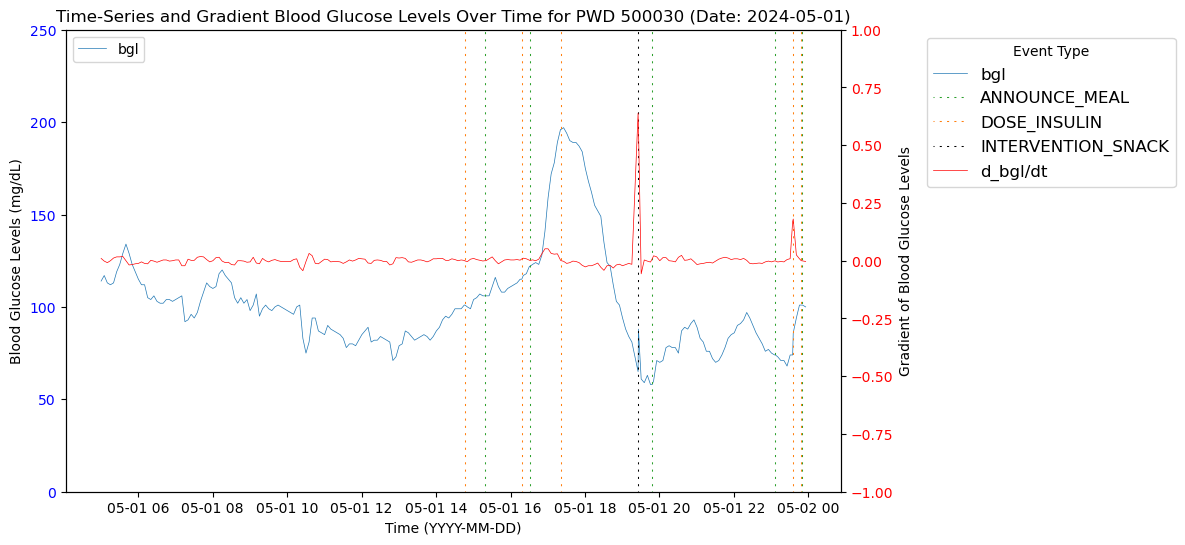

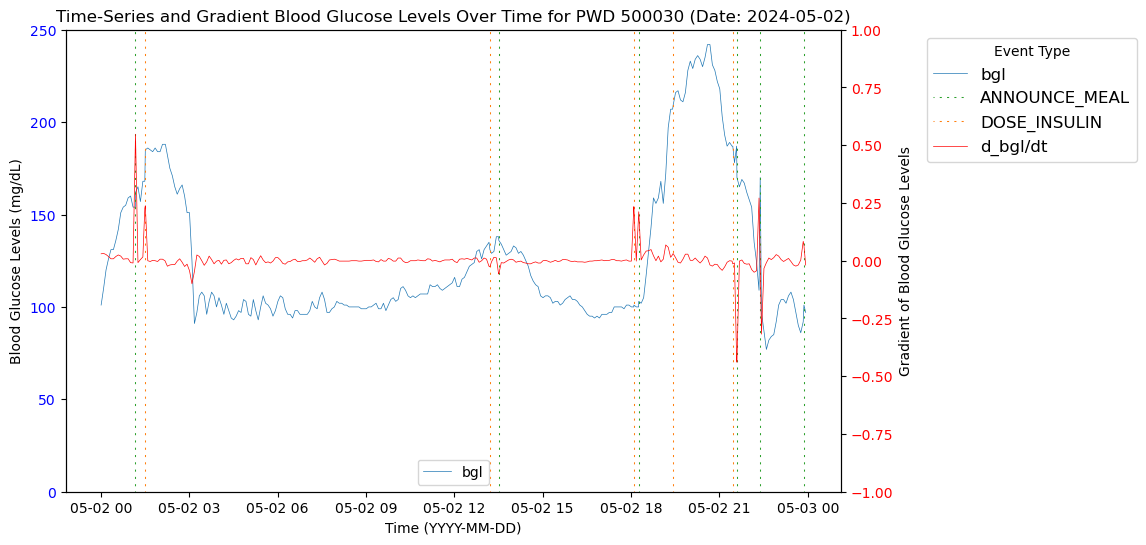

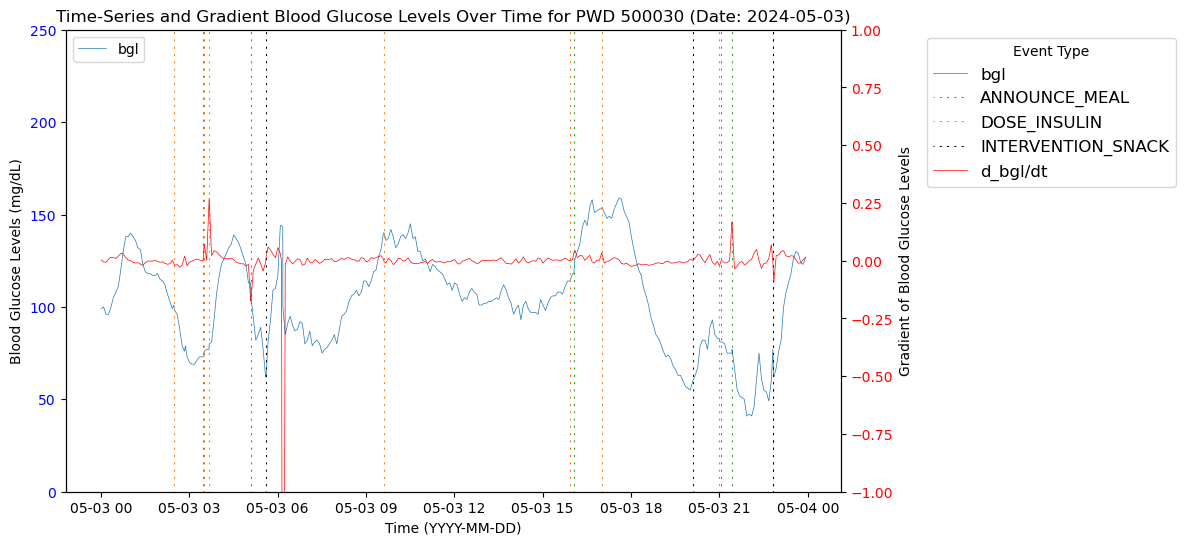

In [59]:
# Plotting time series bgl data and gradient of said data
def time_series_bgl(df,pwd,date):
    #Markers assigned to each event
    event_colors = {
        "ANNOUNCE_MEAL": "#2ca02c",      
        "DOSE_INSULIN": "#ff7f0e",
        "INTERVENTION_SNACK": "#000000",
    }

    # Isolating data for a single day
    day_data = isolate_day_data(isolate_pwd_data(df,pwd), date)
    day_data['time_in_seconds'] = (day_data['date'] - min(day_data['date'])).dt.total_seconds()

    # Calculating bgl gradient and ignoring any divide by zero warnings and nan warnings
    with np.errstate(divide='ignore', invalid='ignore'):
        dbgl_dt = np.gradient(day_data['bgl'].to_numpy(), day_data['time_in_seconds'].to_numpy())

    day_data['d_bgl/dt'] = dbgl_dt

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting time-series data
    ax1.set_title(f"Time-Series and Gradient Blood Glucose Levels Over Time for PWD {pwd} (Date: {date})")
    ax1.set_xlabel("Time (YYYY-MM-DD)")
    ax1.set_ylabel("Blood Glucose Levels (mg/dL)")
    ax1.tick_params(axis='x', rotation=0)
    ax1.tick_params(axis='y', labelcolor="blue")
    
    # Some arbitrary scale for easier comparison between plots
    ax1.set_ylim([0, 250])

    # Plotting
    sns.lineplot(ax=ax1, data=day_data, x='date', y='bgl', label='bgl', linewidth=0.5)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Gradient of Blood Glucose Levels')

    sns.lineplot(ax=ax2, data=day_data, x='date', y='d_bgl/dt', label='d_bgl/dt', color="red", linewidth=0.5)
    ax2.set_ylim(min(dbgl_dt) - np.ptp(dbgl_dt) * 0.1, max(dbgl_dt) + np.ptp(dbgl_dt) * 0.1)
    ax2.tick_params(axis='y', labelcolor="red")

    # Some arbitrary scale for easier comparison between plots
    ax2.set_ylim([-1, 1])

    for event_type, event_color in event_colors.items():
        event_data = day_data[day_data['msg_type']==event_type]
        for event_time in event_data['date']:
            ax1.axvline(x=event_time, color=event_color, linestyle=(1, (2, 5)), label=event_type, lw=0.75)

    # Combining legends
    handles1, labels1 = ax1.get_legend_handles_labels()  # From ax1
    handles2, labels2 = ax2.get_legend_handles_labels()  # From ax2
    handles = handles1 + handles2  # Combine the handles
    labels = labels1 + labels2  # Combine the labels

    # Remove duplicate labels
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Event Type', fontsize="large", loc="upper left", bbox_to_anchor=(1.1,1))
    plt.show()

    

time_series_bgl(df,'500030','2024-05-01')

time_series_bgl(df,'500030','2024-05-02')

time_series_bgl(df,'500030','2024-05-03')

time_series_bgl(df,'500030','2024-05-04')

### Ask a question(s) about the data and/or diabetes!
When creating the visualizations you probably had some questions about managing T1D. Ask some questions that might interest you and our diabetes experts will do their best to answer them for you! *Consider this an AMAA about diabetes.* 

1. What are the common reasons for discrepancies between continuous glucose monitor readings and fingerstick  blood glucose levels data, and how can these be minimized for more accurate glucose management?
2. What role does the rate of change in bgl play in preventing complications from hypoglycemia or hyperglycemia, and are there recommended thresholds for when intervention is necessary based on the gradient?

### Final Task

Thanks for showing interest in our project! We plan to incorporate the best/most interesting visualizations into a substack post in the future. 

Please remember to create a pull request with your updated template, don't forget to rename the file to something that we can identify you with, e.g: `eda_[your_name].ipynb`